# Prelimnary data analysis
We inspect the data, look for outliers, and handle them for future modelling.


In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Get the data 
df = pd.read_csv("MergedDataset.csv")
df

,Date,Hour,Datetime,Toronto,HOEP,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover,isWeekend,isHoliday
0,2004-01-01,00:00:00.000000000,2004-01-01 00:00:00,4606,30.90,0.198,0.001,0.000,1.156,1.279,0.0,0.0,0.118,0,1
1,2004-01-01,01:00:00.000000000,2004-01-01 01:00:00,4366,27.13,0.339,0.001,0.000,1.156,1.279,0.0,0.0,0.148,0,1
2,2004-01-01,02:00:00.000000000,2004-01-01 02:00:00,4188,25.23,0.502,0.001,0.001,1.156,1.280,0.0,0.0,0.144,0,1
3,2004-01-01,03:00:00.000000000,2004-01-01 03:00:00,4046,24.29,0.534,0.000,0.000,1.157,1.280,0.0,0.0,0.159,0,1
4,2004-01-01,04:00:00.000000000,2004-01-01 04:00:00,3974,24.42,0.494,0.000,0.000,1.157,1.281,0.0,0.0,0.194,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131491,2018-12-31,19:00:00.000000000,2018-12-31 19:00:00,5755,5.62,2.908,2.279,0.566,3.426,1.243,0.0,0.0,0.988,0,0
131492,2018-12-31,20:00:00.000000000,2018-12-31 20:00:00,5544,8.95,2.383,1.402,0.263,3.773,1.242,0.0,0.0,0.981,0,0
131493,2018-12-31,21:00:00.000000000,2018-12-31 21:00:00,5338,5.81,2.611,0.244,0.041,3.866,1.237,0.0,0.0,0.985,0,0
131494,2018-12-31,22:00:00.000000000,2018-12-31 22:00:00,5091,2.87,3.384,0.283,0.076,3.872,1.227,0.0,0.0,0.990,0,0


In [3]:
df.dtypes

Date                  object
Hour                  object
Datetime              object
Toronto                int64
HOEP                 float64
temperature          float64
precipitation        float64
snowfall             float64
snow_mass            float64
air_density          float64
radiation_surface    float64
radiation_toa        float64
cloud_cover          float64
isWeekend              int64
isHoliday              int64
dtype: object

In [4]:
# Make the datetime column have datetime time
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.dtypes

Date                         object
Hour                         object
Datetime             datetime64[ns]
Toronto                       int64
HOEP                        float64
temperature                 float64
precipitation               float64
snowfall                    float64
snow_mass                   float64
air_density                 float64
radiation_surface           float64
radiation_toa               float64
cloud_cover                 float64
isWeekend                     int64
isHoliday                     int64
dtype: object

In [5]:
# Time series with the Datetime and Demand in kWh
ts = pd.Series(data=df["Toronto"])
ts.index = df["Datetime"]
ts.head(25)

Datetime
2004-01-01 00:00:00    4606
2004-01-01 01:00:00    4366
2004-01-01 02:00:00    4188
2004-01-01 03:00:00    4046
2004-01-01 04:00:00    3974
2004-01-01 05:00:00    3966
2004-01-01 06:00:00    4023
2004-01-01 07:00:00    4082
2004-01-01 08:00:00    4112
2004-01-01 09:00:00    4301
2004-01-01 10:00:00    4496
2004-01-01 11:00:00    4688
2004-01-01 12:00:00    4795
2004-01-01 13:00:00    4796
2004-01-01 14:00:00    4719
2004-01-01 15:00:00    4819
2004-01-01 16:00:00    5053
2004-01-01 17:00:00    5500
2004-01-01 18:00:00    5528
2004-01-01 19:00:00    5441
2004-01-01 20:00:00    5339
2004-01-01 21:00:00    5193
2004-01-01 22:00:00    4962
2004-01-01 23:00:00    4644
2004-01-02 00:00:00    4331
Name: Toronto, dtype: int64

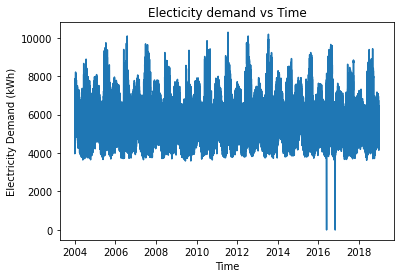

In [6]:
# Plot the time series
plt.plot(ts)
plt.title("Electicity demand vs Time")
plt.xlabel("Time")
plt.ylabel("Electricity Demand (kWh)");

In [7]:
# Calculate some descriptive statistics
ts.describe()

count    131496.000000
mean       5832.855205
std        1042.569898
min           0.000000
25%        5015.000000
50%        5874.000000
75%        6535.000000
max       10285.000000
Name: Toronto, dtype: float64

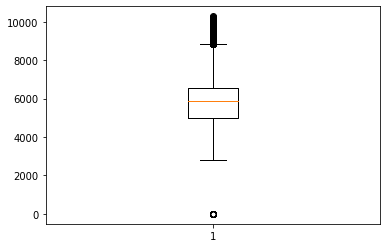

In [8]:
# Check for outliers
plt.boxplot(ts);

In [9]:
# We see that there are some dates with 0 demand, which is impossible
# There is also one date with < 3000 demand which we find unlikely and is followed by the
# 0 demand. We suspect there may have been a transcription error.
ts[ts < 3000]

Datetime
2016-05-29 03:00:00    2806
2016-05-29 04:00:00       0
2016-05-29 05:00:00       0
2016-05-29 06:00:00       0
2016-05-29 07:00:00       0
2016-05-29 08:00:00       0
2016-05-29 09:00:00       0
2016-05-29 10:00:00       0
2016-05-29 11:00:00       0
2016-05-29 12:00:00       0
2016-05-29 13:00:00       0
2016-05-29 14:00:00       0
2016-10-31 00:00:00       0
2016-10-31 01:00:00       0
2016-10-31 02:00:00       0
2016-10-31 03:00:00       0
2016-10-31 04:00:00       0
2016-10-31 05:00:00       0
2016-10-31 06:00:00       0
2016-10-31 07:00:00       0
2016-10-31 08:00:00       0
2016-10-31 09:00:00       0
2016-10-31 10:00:00       0
2016-10-31 11:00:00       0
2016-10-31 12:00:00       0
2016-10-31 13:00:00       0
2016-10-31 14:00:00       0
2016-10-31 15:00:00       0
2016-10-31 16:00:00       0
2016-10-31 17:00:00       0
2016-10-31 18:00:00       0
2016-10-31 19:00:00       0
2016-10-31 20:00:00       0
2016-10-31 21:00:00       0
2016-10-31 22:00:00       0
2016-10-31 

In [10]:
# Get the dates of < 3000 demand
dates_zero_demand = ts[ts < 3000].index
dates_zero_demand

DatetimeIndex(['2016-05-29 03:00:00', '2016-05-29 04:00:00',
               '2016-05-29 05:00:00', '2016-05-29 06:00:00',
               '2016-05-29 07:00:00', '2016-05-29 08:00:00',
               '2016-05-29 09:00:00', '2016-05-29 10:00:00',
               '2016-05-29 11:00:00', '2016-05-29 12:00:00',
               '2016-05-29 13:00:00', '2016-05-29 14:00:00',
               '2016-10-31 00:00:00', '2016-10-31 01:00:00',
               '2016-10-31 02:00:00', '2016-10-31 03:00:00',
               '2016-10-31 04:00:00', '2016-10-31 05:00:00',
               '2016-10-31 06:00:00', '2016-10-31 07:00:00',
               '2016-10-31 08:00:00', '2016-10-31 09:00:00',
               '2016-10-31 10:00:00', '2016-10-31 11:00:00',
               '2016-10-31 12:00:00', '2016-10-31 13:00:00',
               '2016-10-31 14:00:00', '2016-10-31 15:00:00',
               '2016-10-31 16:00:00', '2016-10-31 17:00:00',
               '2016-10-31 18:00:00', '2016-10-31 19:00:00',
               '2016-10-

In [11]:
# Handle this by giving the value of the previous day, this is obviously not
# the most sophisticated way to handle outliers, but it will do for our purposes.
ts[dates_zero_demand] = ts[dates_zero_demand - datetime.timedelta(days=1)].values

In [12]:
# Check that these have been resolved
ts[dates_zero_demand]

Datetime
2016-05-29 03:00:00    4703
2016-05-29 04:00:00    4670
2016-05-29 05:00:00    4766
2016-05-29 06:00:00    5197
2016-05-29 07:00:00    5803
2016-05-29 08:00:00    6355
2016-05-29 09:00:00    6824
2016-05-29 10:00:00    7149
2016-05-29 11:00:00    7351
2016-05-29 12:00:00    7483
2016-05-29 13:00:00    7572
2016-05-29 14:00:00    7642
2016-10-31 00:00:00    4090
2016-10-31 01:00:00    3940
2016-10-31 02:00:00    3861
2016-10-31 03:00:00    3858
2016-10-31 04:00:00    3891
2016-10-31 05:00:00    4023
2016-10-31 06:00:00    4243
2016-10-31 07:00:00    4477
2016-10-31 08:00:00    4786
2016-10-31 09:00:00    5042
2016-10-31 10:00:00    5226
2016-10-31 11:00:00    5298
2016-10-31 12:00:00    5280
2016-10-31 13:00:00    5222
2016-10-31 14:00:00    5217
2016-10-31 15:00:00    5300
2016-10-31 16:00:00    5462
2016-10-31 17:00:00    5721
2016-10-31 18:00:00    5728
2016-10-31 19:00:00    5602
2016-10-31 20:00:00    5402
2016-10-31 21:00:00    5113
2016-10-31 22:00:00    4764
2016-10-31 

In [13]:
# Add these changes to the merged dataset
# They have already been set since ts is a view into the df
df[df["Datetime"].isin(dates_zero_demand)].Toronto

108771    4703
108772    4670
108773    4766
108774    5197
108775    5803
108776    6355
108777    6824
108778    7149
108779    7351
108780    7483
108781    7572
108782    7642
112488    4090
112489    3940
112490    3861
112491    3858
112492    3891
112493    4023
112494    4243
112495    4477
112496    4786
112497    5042
112498    5226
112499    5298
112500    5280
112501    5222
112502    5217
112503    5300
112504    5462
112505    5721
112506    5728
112507    5602
112508    5402
112509    5113
112510    4764
112511    4466
Name: Toronto, dtype: int64

In [14]:
# Save the new dataframe into the same csv. This is the file we will use onwards.
df.to_csv("MergedDataset.csv")